In [71]:
import random
from numpy.random import default_rng
import pandas as pd
'''
Part A-1
'''
# Generate 10000 samples
py_1 = 0.3
py_2 = 0.3
py_3 = 0.4
mu_1 = [0,0,0]
sig_1 = [[4, 0, 0],
        [0, 4, 0],
        [0, 0, 4]]
mu_2 = [4,0,0]
sig_2 = [[4, 0, 0],
        [0, 4, 0],
        [0, 0, 4]]
mu_3 = [0,3.464,0]
sig_3 = [[8, 0, 0],
        [0, 8, 0],
        [0, 0, 8]]
mu_4 = [4,3.464,0]
sig_4 = [[8, 0, 0],
        [0, 8, 0],
        [0, 0, 8]]

rng = default_rng()
sample_size = 10000
size_1 = 0
size_2 = 0
size_3 = 0
# size_4 = 0
for i in range(0, sample_size):
    r = random.random()
    if r < py_1:
        size_1 = size_1 + 1
    elif r < py_1 + py_2:
        size_2 = size_2 + 1
    else:
        size_3 = size_3 + 1
#     elif r < py_1 + py_2 + py_3/2:
#         size_3 = size_3 + 1
#     else:
#         size_4 = size_4 + 1
samples_1 = rng.multivariate_normal(mean=mu_1,cov=sig_1,size=size_1)
samples_1 = pd.DataFrame(samples_1, columns=['x','y','z'])
samples_1['True class label'] = 1
samples_2 = rng.multivariate_normal(mean=mu_2,cov=sig_2,size=size_2)
samples_2 = pd.DataFrame(samples_2, columns=['x','y','z'])
samples_2['True class label'] = 2
samples_3 = rng.multivariate_normal(mean=mu_3,cov=sig_3,size=size_3)*0.5+rng.multivariate_normal(mean=mu_4,cov=sig_4,size=size_3)*0.5
samples_3 = pd.DataFrame(samples_3, columns=['x','y','z'])
samples_3['True class label'] = 3
# samples_4 = rng.multivariate_normal(mean=mu_4,cov=sig_4,size=size_4)
# samples_4 = pd.DataFrame(samples_4, columns=['x','y','z'])
# samples_4['True class label'] = 3
# samples = pd.concat([samples_1, samples_2, samples_3, samples_4], ignore_index=True)
samples = pd.concat([samples_1, samples_2, samples_3], ignore_index=True)
samples

mu_3 = [2,3.464,0] # sum of gaussians is still gausians
sig_3 = [[4,0,0],
        [0,4,0],
        [0,0,4]]

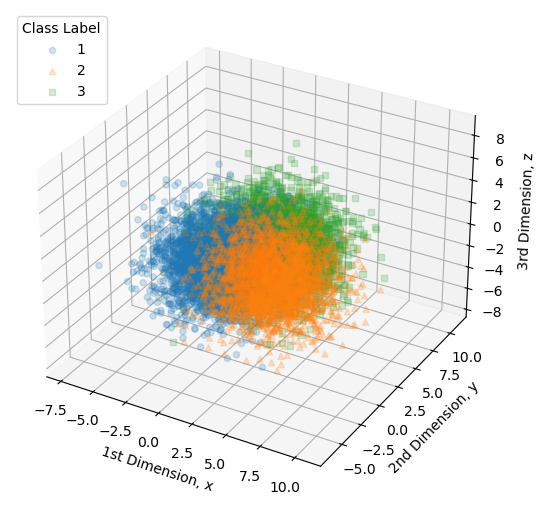

In [72]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
samples_1 = samples[samples['True class label']==1]
samples_2 = samples[samples['True class label']==2]
samples_3 = samples[samples['True class label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2)
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2)
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2)
    #ax.set_title("Samples from Multivariate Gaussian Distributions")
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
ax.legend(loc='upper left', title='Class Label')

In [74]:
'''
Part A-2
'''
from scipy.stats import multivariate_normal

# Define risk function
def risk(i,x,loss_mat,sample_info):
    risk = 0
    for j, row in sample_info.iterrows():
        if(i==j):
            continue
#         print(multivariate_normal.pdf(x,row['mu'],row['sig']))
        risk = risk + loss_mat[i][j]*row['p']*multivariate_normal.pdf(x,row['mu'],row['sig'])
    return risk

In [93]:
import numpy as np
# Estimate the confusion matrix
decisions = []
correct_decisions = []
loss_mat = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]
sample_info = pd.DataFrame(columns=['p','mu','sig'])
d = {'p':py_1,'mu':mu_1,'sig':sig_1}
sample_info = sample_info.append(d,ignore_index=True)
d = {'p':py_2,'mu':mu_2,'sig':sig_2}
sample_info = sample_info.append(d,ignore_index=True)
d = {'p':py_3,'mu':mu_3,'sig':sig_3}
sample_info = sample_info.append(d,ignore_index=True)
# d = {'p':py_3,'mu':mu_4,'sig':sig_4}
# sample_info = sample_info.append(d,ignore_index=True)

for idx, row in samples.iterrows():
    true_class_label = int(row['True class label'])
    decision = 1+np.argmin([risk(0,[row['x'],row['y'],row['z']],loss_mat,sample_info), risk(1,[row['x'],row['y'],row['z']],loss_mat,sample_info),risk(2,[row['x'],row['y'],row['z']],loss_mat,sample_info)])
#     , risk(3,[row['x'],row['y'],row['z']],loss_mat,sample_info)])
    
    if(decision==4):
        decision = 3
    decisions.append(decision)
    
    if(decision==true_class_label):
        correct_decisions.append(True)
    else:
        correct_decisions.append(False)
        
samples['Classification'] = decisions
samples['Correct Decisions'] = correct_decisions

/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_37230/55571066.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_info = sample_info.append(d,ignore_index=True)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_37230/55571066.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_info = sample_info.append(d,ignore_index=True)
/var/folders/tl/rv00j3kx04s2zm4w0_z876180000gn/T/ipykernel_37230/55571066.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_info = sample_info.append(d,ignore_index=True)


In [94]:
samples

,x,y,z,True class label,Classification,Correct Decisions
0,-3.203397,-1.129082,-0.319582,1,1,True
1,-0.690050,-2.228934,5.357277,1,1,True
2,1.310980,-4.318902,0.514808,1,1,True
3,0.074293,1.021070,-0.327436,1,1,True
4,-0.769128,-0.417153,3.644778,1,1,True
...,...,...,...,...,...,...
9995,2.717037,1.139176,0.743553,3,2,False
9996,1.581588,1.741376,2.418245,3,3,True
9997,4.670203,4.017668,-3.045423,3,3,True
9998,-2.320048,2.123985,0.096803,3,1,False


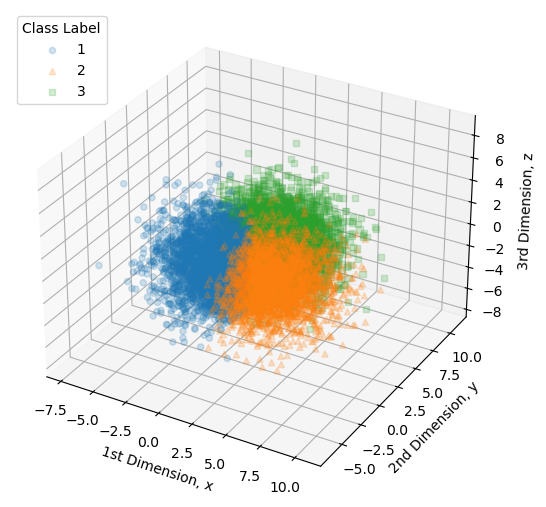

In [95]:
fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
samples_1 = samples[samples['Classification']==1]
samples_2 = samples[samples['Classification']==2]
samples_3 = samples[samples['Classification']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2)
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2)
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2)
    #ax.set_title("Samples from Multivariate Gaussian Distributions")
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
ax.legend(loc='upper left', title='Class Label')

In [96]:
from sklearn.metrics import confusion_matrix
true_class_label=samples['True class label'].tolist()
confusion_mat = confusion_matrix(true_class_label,decisions,normalize='true')
print(confusion_mat)

[[0.73032598 0.11162331 0.15805071]
 [0.1206544  0.72801636 0.15132924]
 [0.10424423 0.10052122 0.79523455]]


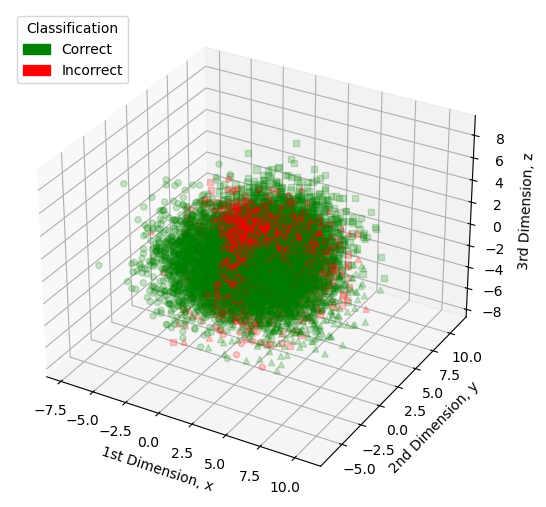

In [97]:
import matplotlib.patches as mpatches
'''
Part A-3
'''
fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = samples[samples['Correct Decisions']==True]
samples_1 = correct[correct['True class label']==1]
samples_2 = correct[correct['True class label']==2]
samples_3 = correct[correct['True class label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='green')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='green')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='green')
# Plot incorrect
correct = samples[samples['Correct Decisions']==False]
samples_1 = correct[correct['True class label']==1]
samples_2 = correct[correct['True class label']==2]
samples_3 = correct[correct['True class label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='red')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='red')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='red')
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')

[[0.37141916 0.03720777 0.59137307]
 [0.04703476 0.37116564 0.58179959]
 [0.01017622 0.00943162 0.98039216]]


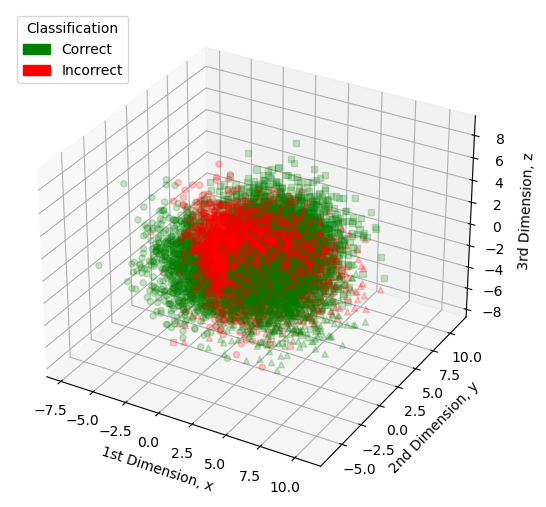

In [99]:
'''
Part B
'''
loss_mat = [[0,1,10],
           [1,0,10],
           [1,1,0]]
decisions = []
correct_decisions = []

for idx, row in samples.iterrows():
    true_class_label = int(row['True class label'])
    decision = 1+np.argmin([risk(0,[row['x'],row['y'],row['z']],loss_mat,sample_info), risk(1,[row['x'],row['y'],row['z']],loss_mat,sample_info),
                         risk(2,[row['x'],row['y'],row['z']],loss_mat,sample_info)])
    
    if(decision==4):
        decision = 3
    decisions.append(decision)
    
    if(decision==true_class_label):
        correct_decisions.append(True)
    else:
        correct_decisions.append(False)
        
samples['Classification'] = decisions
samples['Correct Decisions'] = correct_decisions

true_class_label=samples['True class label'].tolist()
confusion_mat = confusion_matrix(true_class_label,decisions,normalize='true')
print(confusion_mat)

fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = samples[samples['Correct Decisions']==True]
samples_1 = correct[correct['True class label']==1]
samples_2 = correct[correct['True class label']==2]
samples_3 = correct[correct['True class label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='green')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='green')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='green')
# Plot incorrect
correct = samples[samples['Correct Decisions']==False]
samples_1 = correct[correct['True class label']==1]
samples_2 = correct[correct['True class label']==2]
samples_3 = correct[correct['True class label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='red')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='red')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='red')
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')

[[7.50740863e-02 4.28054001e-03 9.20645374e-01]
 [4.77164281e-03 7.22563054e-02 9.22972052e-01]
 [4.96401092e-04 2.48200546e-04 9.99255398e-01]]


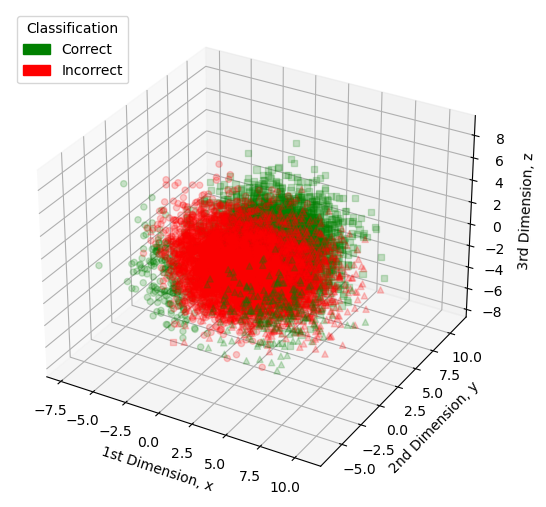

In [100]:
loss_mat = [[0,1,100],
           [1,0,100],
           [1,1,0]]
decisions = []
correct_decisions = []

for idx, row in samples.iterrows():
    true_class_label = int(row['True class label'])
    decision = 1+np.argmin([risk(0,[row['x'],row['y'],row['z']],loss_mat,sample_info), risk(1,[row['x'],row['y'],row['z']],loss_mat,sample_info),
                         risk(2,[row['x'],row['y'],row['z']],loss_mat,sample_info)])
    
    if(decision==4):
        decision = 3
    decisions.append(decision)
    
    if(decision==true_class_label):
        correct_decisions.append(True)
    else:
        correct_decisions.append(False)
        
samples['Classification'] = decisions
samples['Correct Decisions'] = correct_decisions

true_class_label=samples['True class label'].tolist()
confusion_mat = confusion_matrix(true_class_label,decisions,normalize='true')
print(confusion_mat)

fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = samples[samples['Correct Decisions']==True]
samples_1 = correct[correct['True class label']==1]
samples_2 = correct[correct['True class label']==2]
samples_3 = correct[correct['True class label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='green')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='green')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='green')
# Plot incorrect
correct = samples[samples['Correct Decisions']==False]
samples_1 = correct[correct['True class label']==1]
samples_2 = correct[correct['True class label']==2]
samples_3 = correct[correct['True class label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='red')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='red')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='red')
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')